In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
df = pd.read_csv("heart_disease.csv")
df.rename(columns={"condition": "target"}, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [18]:
df.info()
df.isnull().sum()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


target
0    160
1    137
Name: count, dtype: int64

In [19]:
# Convert target values to binary if needed
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

In [20]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

In [23]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Confusion Matrix:
 [[23  9]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



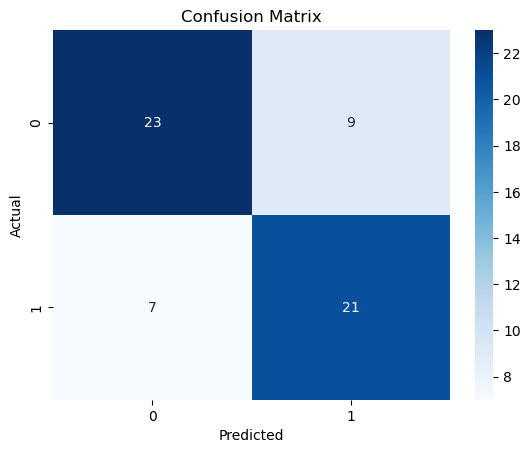

In [31]:
# Confusion matrix visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [34]:
# Predict labels for test set
rf_y_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.7
Confusion Matrix:
 [[22 10]
 [ 8 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 5, 10],      # Depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples to split node
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

grid_search.fit(X_train_scaled, y_train)
print("Best parameters found:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Evaluate the best model
best_rf_pred = best_rf.predict(X_test_scaled)
print("Tuned RF Accuracy:", accuracy_score(y_test, best_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf_pred))
print("Classification Report:\n", classification_report(y_test, best_rf_pred))

Best parameters found: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Tuned RF Accuracy: 0.75
Confusion Matrix:
 [[23  9]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

